In [ ]:
import numpy as np
import tensorflow as tf
from keras.optimizers import Adam
from keras.utils import np_utils
import cv2
import os
import numpy as np
batch_size = 32
img_height = 160
img_width = 160

train_dir='/content/drive/MyDrive/Colab Notebooks/train-test-80-20-Vol2/train-test-80-20/Train-Test-80-20/Train'
test_dir='/content/drive/MyDrive/Colab Notebooks/train-test-80-20-Vol2/train-test-80-20/Train-Test-80-20/Test'


labels = ['Hasta', 'Saglikli']
img_size = 160

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1]
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)



train=get_data(train_dir)
test=get_data(test_dir)



x_train=[]
y_train=[]

x_test=[]
y_test=[]



for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)




y_test = np.array(y_test)
y_train=np.array(y_train)


x_test=np.array(x_test)
x_train=np.array(x_train)


from sklearn.utils import shuffle
x_train,y_train=shuffle(x_train,y_train)
x_test,y_test=shuffle(x_test,y_test)

data_augmentation = tf.keras.Sequential([

tf.keras.layers.experimental.preprocessing.RandomContrast(0.1,1.0)
])

transfer_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width) + (3,),
                                               include_top=False,
                                               weights='imagenet')

transfer_model.trainable = False

inputs = tf.keras.Input(shape=(img_height, img_width, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
x = transfer_model(x, training=False)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5,beta_1=0.9,beta_2=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 40
model.summary()
history = model.fit(x_train,y_train,
                    32,
                    epochs=epochs)
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(x_test)
predictions = tf.where(predictions < 0.5, 0, 1)
print(classification_report(y_test, predictions, target_names = ['hasta (Class 0)','saglikli (Class 1)']))
print('Confusion Matrix')
print(confusion_matrix(y_test,predictions))

#model.save('CNN_MODEL_MOBILNETV2')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


9412608/9406464 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 160, 160, 3)]     0         
_________________________________________________________________
sequential (Sequential)      (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.truediv (TFOpLambda) (None, 160, 160, 3)       0         
_________________________________________________________________
tf.math.subtract (TFOpLambda (None, 160, 160, 3)       0         
_________________________________________________________________
mobilenetv2_1.00_160 (Functi (None, 5, 5, 1280)        2257984   
_________________________________________________________________
flatten (Flatten)            (None, 32000)             0         
________________________________________________________________

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

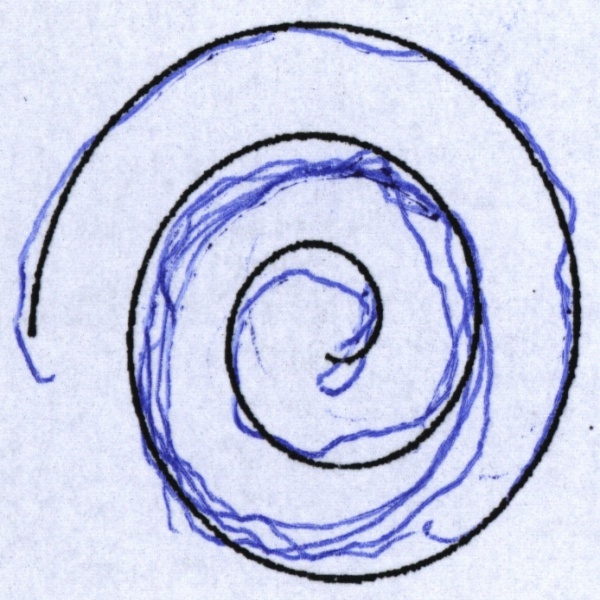

In [ ]:
model_builder=tf.keras.models.load_model('CNN_MODEL_MOBILNETV2')
img_size = (224, 224)
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
decode_predictions = tf.keras.applications.mobilenet_v2.decode_predictions

last_conv_layer_name = "mobilenetv2_1.00_224"

# The local path to our target image
img_path = tf.keras.utils.get_file(
    "/content/drive/MyDrive/Colab Notebooks/train-test-80-20-Vol2/train-test-80-20/Train-Test-80-20/Test/Hasta/sp1-P28.jpg","/content/drive/MyDrive/Colab Notebooks/train-test-80-20-Vol2/train-test-80-20/Train-Test-80-20/Test/Hasta/sp1-P28.jpg"
)
    

display(Image(img_path))